## TRILEGAL Sample Download Tests

This code opens each of the TRILEGAL samples that have been downloaded and formats them for the study. In this case that means: 

- Creating a comma-separation as opposed to white space
- Altering the header so that the column names match the columns of their values 
- Dropping the last line of the file, a comment, so that the samples can be stitched together later. 

In [33]:
# Import modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import glob
import csv
import os
import time
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.patches as mpatches

In [34]:
# All Kepler modules for which we have taken samples. 
modules = [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]

This code works for a directory of TRILEGAL samples from various modules on Kepler with the file designation:

'module_[module number]_download_[download number].csv'

It will cycle through each file for each module to make these changes, and to check the length of each of the samples for consistency. 

In [32]:
# Path to trilegal module samples
path = '/Users/jess/SF_m_dwarfs/trilegal_separate_module_samples/'

# For each module, find the files for that module.
for i in modules:
    print('Module ' + str(i))
    
    samples = glob.glob(path + 'module_' + str(i) + '_download_*.csv')
    print('There are ' + str(len(samples)) + ' samples for this module.')
    
    stars_in_sample = []
    # For each of the sample files 
    for j in samples:
        download = j[-5:-4] # file number 
        len_test = pd.read_csv(j)
        begin = len(len_test)
        print('Lines in start file: ' + str(begin))
        
        # Change the sporadic white space separators to commas for a csv where columns can be read
        # Changes file in situ
        with open(path + 'module_' + str(i) + '_download_' + str(download) + '.csv', 'r+') as f:
            text = f.read()
            f.seek(0)
            f.truncate()
            f.write(text.replace(' ', ','))
        with open(path + 'module_' + str(i) + '_download_' + str(download) + '.csv', 'r+') as f:
            text = f.read()
            f.seek(0)
            f.truncate()
            f.write(text.replace(',,,,,', ','))
        with open(path + 'module_' + str(i) + '_download_' + str(download) + '.csv', 'r+') as f:
            text = f.read()
            f.seek(0)
            f.truncate()
            f.write(text.replace(',,,,', ','))
        with open(path + 'module_' + str(i) + '_download_' + str(download) + '.csv', 'r+') as f:
            text = f.read()
            f.seek(0)
            f.truncate()
            f.write(text.replace(',,,', ','))
        with open(path + 'module_' + str(i) + '_download_' + str(download) + '.csv', 'r+') as f:
            text = f.read()
            f.seek(0)
            f.truncate()
            f.write(text.replace(',,', ','))
             
        # Deal with extra unnecessary columns by editing the header and choosing necessary columns later on
        inputFileName = j
        outputFileName = os.path.splitext(inputFileName)[0] + '_edit1.csv'
        
        with open(inputFileName, 'r') as inFile, open(outputFileName, 'w') as outfile:
            r = csv.reader(inFile)
            w = csv.writer(outfile)
            next(r, None)
            w.writerow(['a','Gc','logAge','[M/H]','m_ini','logL','logTe','logg','m-M0','Av','m2/m1','mbol','Kepler','g','r','i','z','DDO51_finf','J','H','Ks','Mact','aa'])
            for row in r:
                w.writerow(row)
                        
        # Choose necessary columns and drop comment line from the end of every file.
        header_change = pd.read_csv(outputFileName)
        new_header = ['Gc','logAge','[M/H]','m_ini','logL','logTe','logg','m-M0','Av','m2/m1','mbol','Kepler','g','r','i','z','DDO51_finf','J','H','Ks','Mact']
        new_header_file = header_change[new_header]
        new_header_file.drop(new_header_file.tail(1).index,inplace=True)
        new_header_file.to_csv(os.path.splitext(inputFileName)[0] + '_final.csv', index=False)
        
        end = len(new_header_file)
        print('Lines in end file: ' + str(end))
        print('Lines removed equal: ' + str(begin - end) + '\n')
        stars_in_sample.append(end)
        
        # Remove files that are no longer needed
        os.remove(outputFileName)
        os.remove(inputFileName)
        
    # Plot the sample numbers for each module for consistency 
    a_list = [1, 2, 3, 4]
    plt.bar(a_list, stars_in_sample, color=['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4'])
    plt.xlabel('Sample Number')
    plt.ylabel('Stars in Sample')
    plt.title('Module ' + str(i))
    plt.xticks(ticks=[1, 2, 3, 4], labels=['1', '2', '3', '4'])
    plt.savefig('/Users/Jess/SF_m_dwarfs/SF_plots/sample_count_plots/module_' + str(i) + '.png')
    plt.show()
        

Module 2
There are 4 samples for this module.
Lines in start file: 123674


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jess/SF_m_dwarfs/trilegal_separate_module_samples/module_2_download_l.csv'

Joining the samples for each module together to produce one large sample for each module. The length of the file at the beginning and end of the process is printed to check for consistency.

In [4]:
in_path = '/Users/jess/SF_m_dwarfs/trilegal_separate_module_samples/'
out_path = '/Users/jess/SF_m_dwarfs/trilegal_combined_modules/'
download_list = [1, 2, 3, 4]

for i in modules:
    print('Module ' + str(i))
    
    file_1 = pd.read_csv(in_path + 'module_' + str(i) + '_download_1_final.csv')
    file_2 = pd.read_csv(in_path + 'module_' + str(i) + '_download_2_final.csv')
    file_3 = pd.read_csv(in_path + 'module_' + str(i) + '_download_3_final.csv')
    file_4 = pd.read_csv(in_path + 'module_' + str(i) + '_download_4_final.csv')
    print('Length of all files is: ' + str(len(file_1) + len(file_2) + len(file_3) + len(file_4)))
    
    df_list = [file_1, file_2, file_3, file_4]
    full_df = pd.concat(df_list)
    print('Lenth of final file is: ' + str(len(full_df)))
    
    full_df.to_csv(out_path + 'module_' + str(i) + '_compiled.csv', index=False)

Module 2
Length of all files is: 494732
Lenth of final file is: 494732
Module 3
Length of all files is: 636964
Lenth of final file is: 636964
Module 4
Length of all files is: 839596
Lenth of final file is: 839596
Module 6
Length of all files is: 432932
Lenth of final file is: 432932
Module 7
Length of all files is: 548641
Lenth of final file is: 548641
Module 8
Length of all files is: 713655
Lenth of final file is: 713655
Module 9
Length of all files is: 977397
Lenth of final file is: 977397
Module 10
Length of all files is: 1416362
Lenth of final file is: 1416362
Module 11
Length of all files is: 480731
Lenth of final file is: 480731
Module 12
Length of all files is: 613713
Lenth of final file is: 613713
Module 13
Length of all files is: 814492
Lenth of final file is: 814492
Module 14
Length of all files is: 1158392
Lenth of final file is: 1158392
Module 15
Length of all files is: 1733718
Lenth of final file is: 1733718
Module 16
Length of all files is: 538439
Lenth of final file is: 

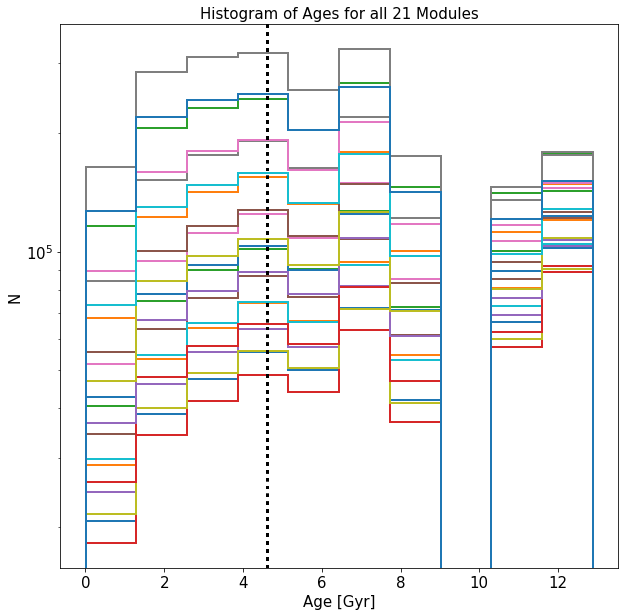

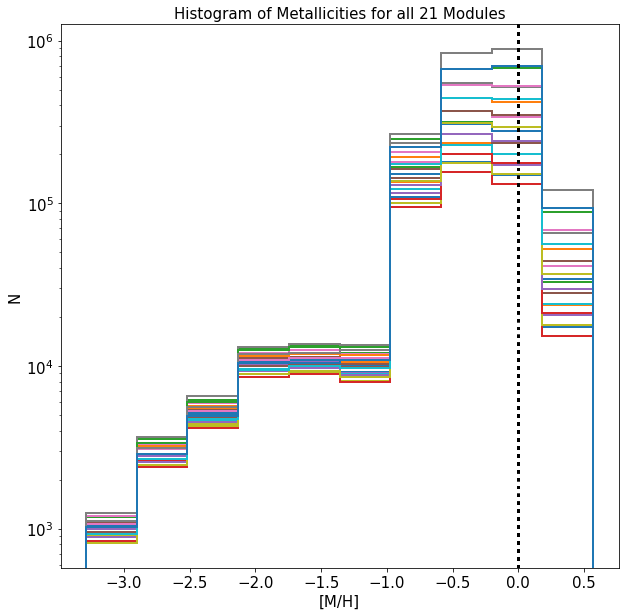

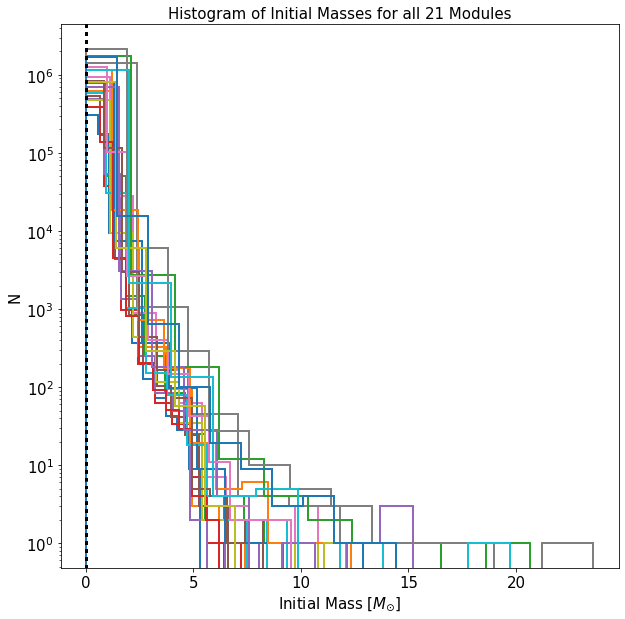

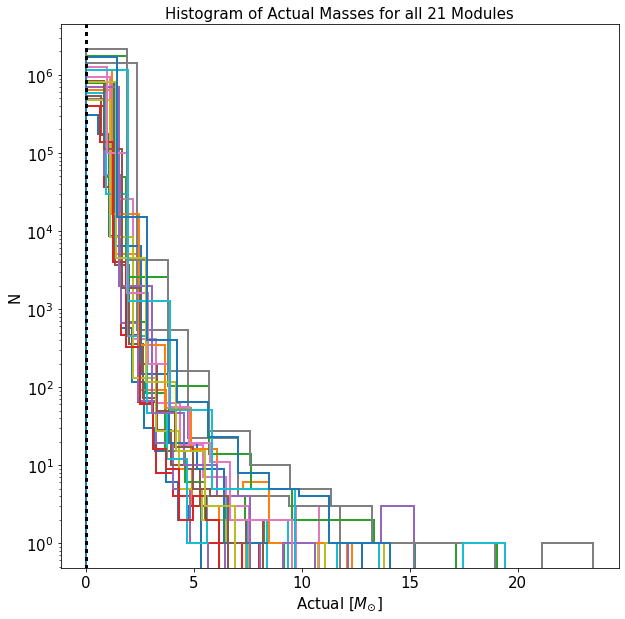

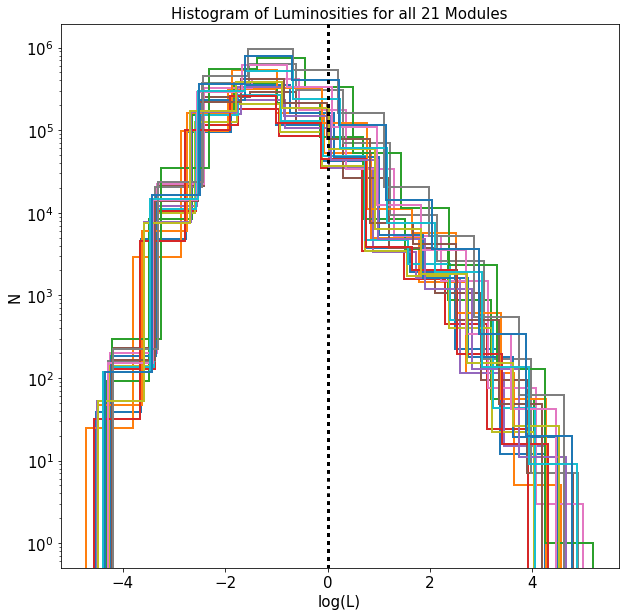

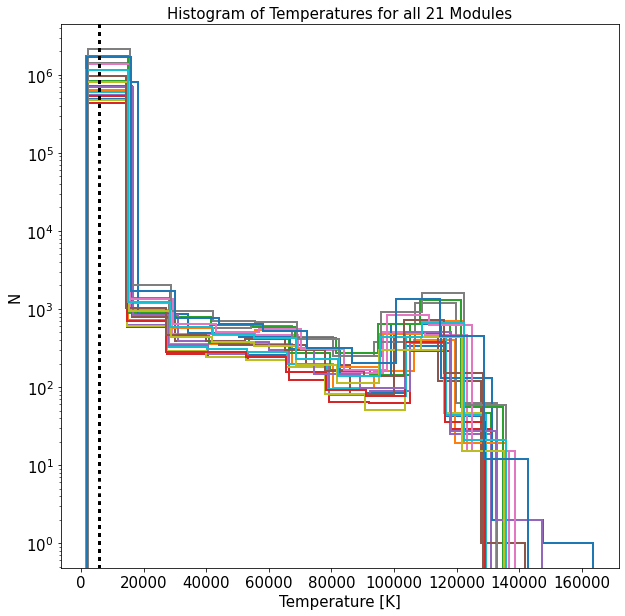

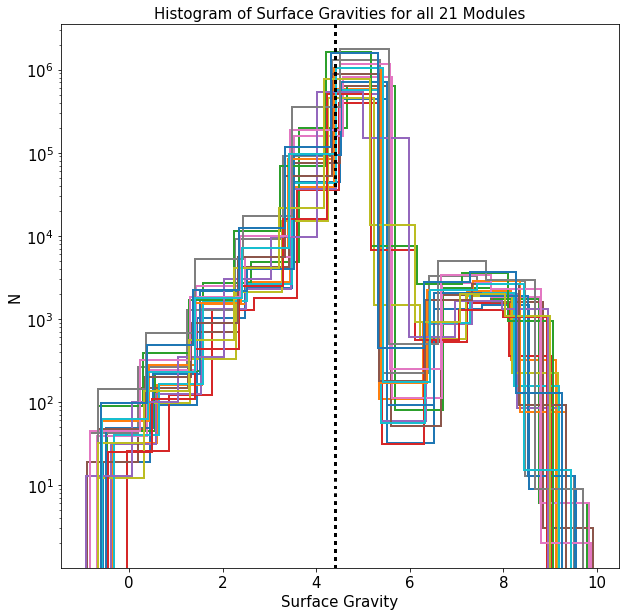

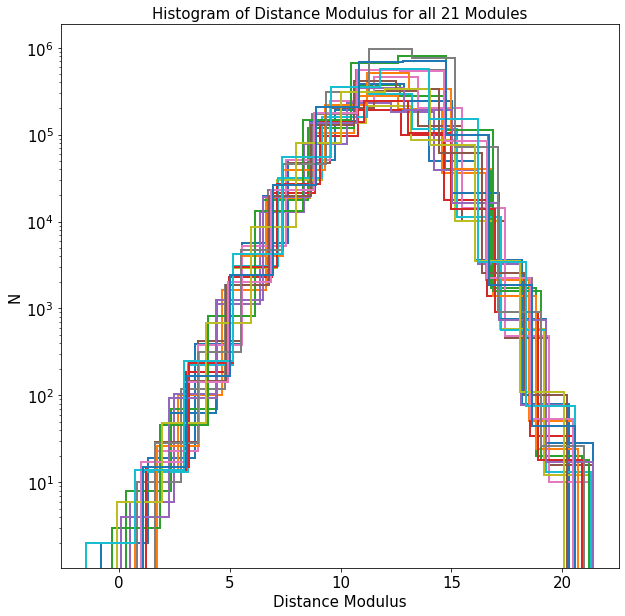

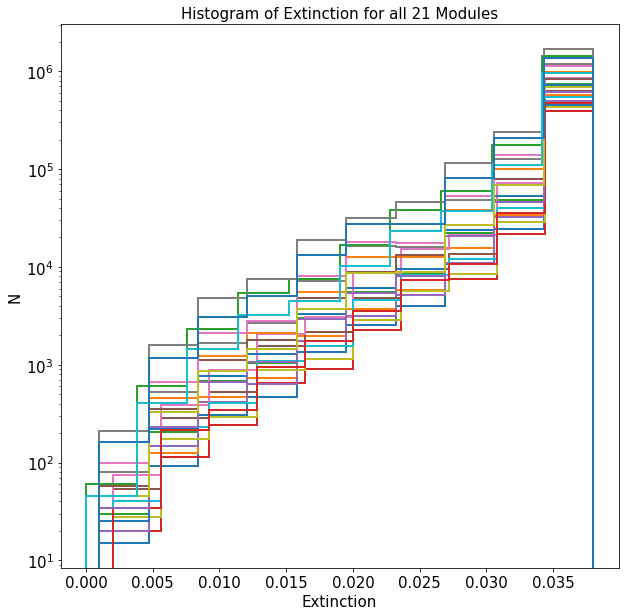

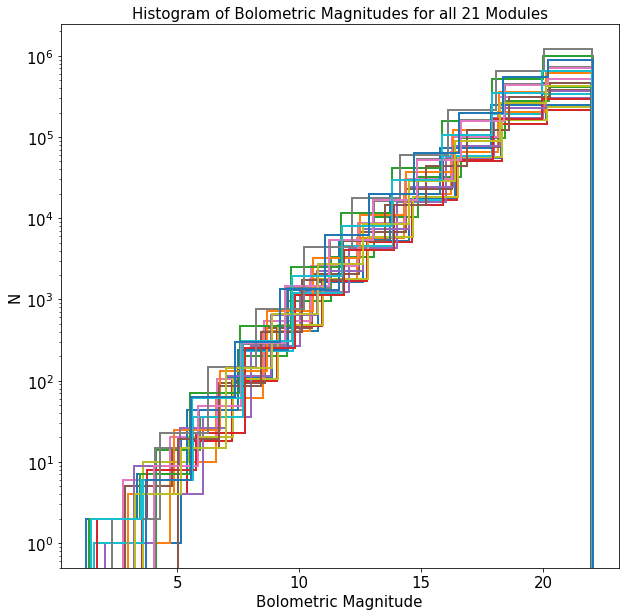

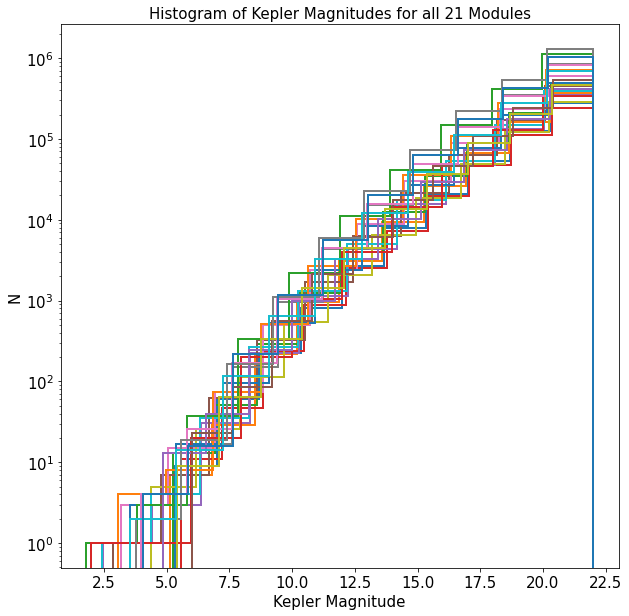

In [36]:
path = '/Users/Jess/SF_m_dwarfs/trilegal_combined_modules/'
out_path = '/Users/Jess/SF_m_dwarfs/SF_plots/sample_parameter_plots/'

# Age plot
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    age = file['logAge']
    plt.hist(10**age/1e9, histtype='step', linewidth=2)
    plt.axvline(4.6, linestyle=':', color='black', linewidth=3)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('Age [Gyr]', fontsize=15)
plt.title('Histogram of Ages for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_age.png')
plt.show()    

# Metallicity plot
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    metal = file['[M/H]']
    plt.hist(metal, histtype='step', linewidth=2)
    plt.axvline(0, linestyle=':', color='black', linewidth=3)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('[M/H]', fontsize=15)
plt.title('Histogram of Metallicities for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_metal.png')
plt.show() 

# Initial mass plot 
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    initial_mass = file['m_ini']
    plt.hist(initial_mass, histtype='step', linewidth=2)
    plt.axvline(0, linestyle=':', color='black', linewidth=3)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel(r'Initial Mass [$M_{\odot}$]', fontsize=15)
plt.title('Histogram of Initial Masses for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_initial_mass.png')
plt.show()

# Actual mass plot
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    act_mass = file['Mact']
    plt.hist(act_mass, histtype='step', linewidth=2)
    plt.axvline(0, linestyle=':', color='black', linewidth=3)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel(r'Actual [$M_{\odot}$]', fontsize=15)
plt.title('Histogram of Actual Masses for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_actual_mass.png')
plt.show()

# Luminosity plot 
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    lum = file['logL']
    plt.hist(lum, histtype='step', linewidth=2)
    plt.axvline(0, linestyle=':', color='black', linewidth=3)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('log(L)', fontsize=15)
plt.title('Histogram of Luminosities for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_luminosity.png')
plt.show()

# Temperature plot
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    teff = file['logTe']
    plt.hist(10**teff, histtype='step', linewidth=2)
    plt.axvline(5778, linestyle=':', color='black', linewidth=3)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('Temperature [K]', fontsize=15)
plt.title('Histogram of Temperatures for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_temp.png')
plt.show()

# Surface gravity plot
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    logg = file['logg']
    plt.hist(logg, histtype='step', linewidth=2)
    plt.axvline(4.4, linestyle=':', color='black', linewidth=3)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('Surface Gravity', fontsize=15)
plt.title('Histogram of Surface Gravities for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_grav.png')
plt.show()

# Distance modulus plot 
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    dist_mod = file['m-M0']
    plt.hist(dist_mod, histtype='step', linewidth=2)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('Distance Modulus', fontsize=15)
plt.title('Histogram of Distance Modulus for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_dist_mod.png')
plt.show()

# Extinction plot 
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    extinc = file['Av']
    plt.hist(extinc, histtype='step', linewidth=2)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('Extinction', fontsize=15)
plt.title('Histogram of Extinction for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_av.png')
plt.show()

# Bolometric magnitude plot 
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    mbol = file['mbol']
    plt.hist(mbol, histtype='step', linewidth=2)
    plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('Bolometric Magnitude', fontsize=15)
plt.title('Histogram of Bolometric Magnitudes for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_mbol.png')
plt.show()

# Kepler magnitude plot 
plt.figure(figsize=(10, 10))
for i in modules: 
    file = pd.read_csv(path + 'module_' + str(i) + '_compiled.csv')
    kep = file['Kepler']
    plt.hist(kep, histtype='step', linewidth=2)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('Kepler Magnitude', fontsize=15)
plt.title('Histogram of Kepler Magnitudes for all 21 Modules', fontsize=15)
plt.savefig(out_path + 'P_kep_mag.png')
plt.show()

In [28]:
no_of_stars = []

for i in modules:
    file = pd.read_csv('/Users/Jess/SF_m_dwarfs/trilegal_combined_modules/module_' + str(i) + '_compiled.csv')
    no_of_stars.append(len(file))

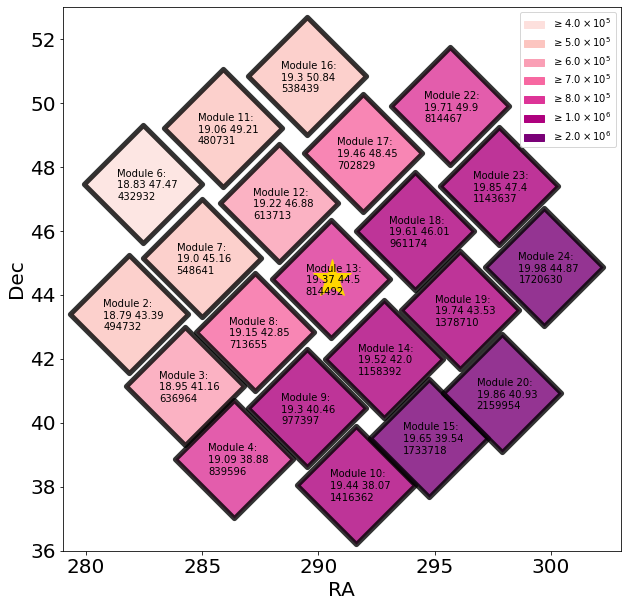

In [75]:
kepler_fov = pd.read_csv('/Users/Jess/SF_m_dwarfs/SF_data_files/complete_kepler_fov_coordinates.csv')
ra = kepler_fov['ra']
dec = kepler_fov['dec']

ra_convert = []
for i in range(len(ra)):
    c = SkyCoord(ra=ra[i]*u.hour, dec=dec[i]*u.degree, frame='icrs')
    new_ra = c.ra.degree
    ra_convert.append(new_ra)

plt.figure(figsize=(10, 10))
plt.scatter(ra_convert[0], dec[0], s = 7000, marker='D', color='#fcc5c0', alpha=0.8, edgecolor='black', linewidth=5, label=r'$10^5$')
plt.text(ra_convert[0]-1.1, dec[0]-0.5, 'Module 2: \n' + str(ra[0]) +  ' ' +  str(dec[0]) + '\n' + str(no_of_stars[0]), fontsize=10)
plt.scatter(ra_convert[1], dec[1], s = 7000, marker='D', color='#fa9fb5', alpha=0.8, edgecolor='black', linewidth=5, label=r'$10^7$')
plt.text(ra_convert[1]-1.1, dec[1]-0.5, 'Module 3: \n' + str(ra[1]) +  ' ' +  str(dec[1]) + '\n' + str(no_of_stars[1]), fontsize=10)
plt.scatter(ra_convert[2], dec[2], s = 7000, marker='D', color='#dd3497', alpha=0.8, edgecolor='black', linewidth=5, label=r'$10^6$')
plt.text(ra_convert[2]-1.1, dec[2]-0.5, 'Module 4: \n' + str(ra[2]) + ' ' + str(dec[2]) + '\n' + str(no_of_stars[2]), fontsize=10) 
plt.scatter(ra_convert[3], dec[3], s = 7000, marker='D', color='#fde0dd', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[3]-1.1, dec[3]-0.5, 'Module 6: \n' + str(ra[3]) + ' ' + str(dec[3]) + '\n' + str(no_of_stars[3]), fontsize=10)
plt.scatter(ra_convert[4], dec[4], s = 7000, marker='D', color='#fcc5c0', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[4]-1.1, dec[4]-0.5, 'Module 7: \n' + str(ra[4]) + ' ' + str(dec[4]) + '\n' + str(no_of_stars[4]), fontsize=10)
plt.scatter(ra_convert[5], dec[5], s = 7000, marker='D', color='#f768a1', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[5]-1.1, dec[5]-0.5, 'Module 8: \n' + str(ra[5]) + ' ' + str(dec[5]) + '\n' + str(no_of_stars[5]), fontsize=10)
plt.scatter(ra_convert[6], dec[6], s = 7000, marker='D', color='#ae017e', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[6]-1.1, dec[6]-0.5, 'Module 9: \n' + str(ra[6]) + ' ' + str(dec[6]) + '\n' + str(no_of_stars[6]), fontsize=10)
plt.scatter(ra_convert[7], dec[7], s = 7000, marker='D', color='#ae017e', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[7]-1.1, dec[7]-0.5, 'Module 10: \n' + str(ra[7]) + ' ' + str(dec[7]) + '\n' + str(no_of_stars[7]), fontsize=10)
plt.scatter(ra_convert[8], dec[8], s = 7000, marker='D', color='#fcc5c0', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[8]-1.1, dec[8]-0.5, 'Module 11: \n' + str(ra[8]) + ' ' + str(dec[8]) + '\n' + str(no_of_stars[8]), fontsize=10)
plt.scatter(ra_convert[9], dec[9], s = 7000, marker='D', color='#fa9fb5', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[9]-1.1, dec[9]-0.5, 'Module 12: \n' + str(ra[9]) + ' ' + str(dec[9]) + '\n' + str(no_of_stars[9]), fontsize=10)
plt.scatter(ra_convert[10], dec[10], s = 7000, marker='D', color='#dd3497', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[10]-1.1, dec[10]-0.5, 'Module 13: \n' + str(ra[10]) + ' ' + str(dec[10]) + '\n' + str(no_of_stars[10]), fontsize=10)
plt.scatter(ra_convert[11], dec[11], s = 7000, marker='D', color='#ae017e', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[11]-1.1, dec[11]-0.5, 'Module 14: \n' + str(ra[11]) + ' ' + str(dec[11]) + '\n' + str(no_of_stars[11]), fontsize=10)
plt.scatter(ra_convert[12], dec[12], s = 7000, marker='D', color='#7a0177', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[12]-1.1, dec[12]-0.5, 'Module 15: \n' + str(ra[12]) + ' ' + str(dec[12]) + '\n' + str(no_of_stars[12]), fontsize=10)
plt.scatter(ra_convert[13], dec[13], s = 7000, marker='D', color='#fcc5c0', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[13]-1.1, dec[13]-0.5, 'Module 16: \n' + str(ra[13]) + ' ' + str(dec[13]) + '\n' + str(no_of_stars[13]), fontsize=10)
plt.scatter(ra_convert[14], dec[14], s = 7000, marker='D', color='#f768a1', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[14]-1.1, dec[14]-0.5, 'Module 17: \n' + str(ra[14]) + ' ' + str(dec[14]) + '\n' + str(no_of_stars[14]), fontsize=10)
plt.scatter(ra_convert[15], dec[15], s = 7000, marker='D', color='#ae017e', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[15]-1.1, dec[15]-0.5, 'Module 18: \n' + str(ra[15]) + ' ' + str(dec[15]) + '\n' + str(no_of_stars[15]), fontsize=10)
plt.scatter(ra_convert[16], dec[16], s = 7000, marker='D', color='#ae017e', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[16]-1.1, dec[16]-0.5, 'Module 19: \n' + str(ra[16]) + ' ' + str(dec[16]) + '\n' + str(no_of_stars[16]), fontsize=10)
plt.scatter(ra_convert[17], dec[17], s = 7000, marker='D', color='#7a0177', alpha=0.8, edgecolor='black', linewidth=5) 
plt.text(ra_convert[17]-1.1, dec[17]-0.5, 'Module 20: \n' + str(ra[17]) + ' ' + str(dec[17]) + '\n' + str(no_of_stars[17]), fontsize=10)
plt.scatter(ra_convert[18], dec[18], s = 7000, marker='D', color='#dd3497', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[18]-1.1, dec[18]-0.5, 'Module 22: \n' + str(ra[18]) + ' ' + str(dec[18]) + '\n' + str(no_of_stars[18]), fontsize=10)
plt.scatter(ra_convert[19], dec[19], s = 7000, marker='D', color='#ae017e', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[19]-1.1, dec[19]-0.5, 'Module 23: \n' + str(ra[19]) + ' ' + str(dec[19]) + '\n' + str(no_of_stars[19]), fontsize=10)
plt.scatter(ra_convert[20], dec[20], s = 7000, marker='D', color='#7a0177', alpha=0.8, edgecolor='black', linewidth=5)
plt.text(ra_convert[20]-1.1, dec[20]-0.5, 'Module 24: \n' + str(ra[20]) + ' ' + str(dec[20]) + '\n' + str(no_of_stars[20]), fontsize=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(279, 303)
plt.ylim(36, 53)

patch_1 = mpatches.Patch(color='#fde0dd', label=r'$\geq 4.0 \times 10^5$')
patch_2 = mpatches.Patch(color='#fcc5c0', label=r'$\geq5.0 \times 10^5$')
patch_3 = mpatches.Patch(color='#fa9fb5', label=r'$\geq6.0 \times 10^5$')
patch_4 = mpatches.Patch(color='#f768a1', label=r'$\geq7.0 \times 10^5$')
patch_5 = mpatches.Patch(color='#dd3497', label=r'$\geq8.0 \times 10^5$')
patch_6 = mpatches.Patch(color='#ae017e', label=r'$\geq1.0 \times 10^6$')
patch_7 = mpatches.Patch(color='#7a0177', label=r'$\geq2.0 \times 10^6$')
plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5, patch_6, patch_7], fontsize=10)
plt.plot(290.6, 44.5, marker='*', ms=40, color='gold')
plt.xlabel('RA', fontsize=20)
plt.ylabel('Dec', fontsize=20)
plt.savefig('/Users/Jess/SF_m_dwarfs/SF_plots/P_trilegal_sample_on_kepler_FOV.png')
plt.show()

Compiles all the module samples into the final TRILEGAL sample.

In [23]:
in_path = '/Users/jess/SF_m_dwarfs/trilegal_combined_modules/'
out_path = '/Users/jess/SF_m_dwarfs/SF_trilegal_data/'

file_list = []
file_lengths = []

df1 = pd.read_csv(in_path + 'module_2_compiled.csv')
df2 = pd.read_csv(in_path + 'module_3_compiled.csv')
df3 = pd.read_csv(in_path + 'module_4_compiled.csv')
df4 = pd.read_csv(in_path + 'module_6_compiled.csv')
df5 = pd.read_csv(in_path + 'module_7_compiled.csv')
df6 = pd.read_csv(in_path + 'module_8_compiled.csv')
df7 = pd.read_csv(in_path + 'module_9_compiled.csv')
df8 = pd.read_csv(in_path + 'module_10_compiled.csv')
df9 = pd.read_csv(in_path + 'module_11_compiled.csv')
df10 = pd.read_csv(in_path + 'module_12_compiled.csv')
df11 = pd.read_csv(in_path + 'module_13_compiled.csv')
df12 = pd.read_csv(in_path + 'module_14_compiled.csv')
df13 = pd.read_csv(in_path + 'module_15_compiled.csv')
df14 = pd.read_csv(in_path + 'module_16_compiled.csv')
df15 = pd.read_csv(in_path + 'module_17_compiled.csv')
df16 = pd.read_csv(in_path + 'module_18_compiled.csv')
df17 = pd.read_csv(in_path + 'module_19_compiled.csv')
df18 = pd.read_csv(in_path + 'module_20_compiled.csv')
df19= pd.read_csv(in_path + 'module_22_compiled.csv')
df20 = pd.read_csv(in_path + 'module_23_compiled.csv')
df21 = pd.read_csv(in_path + 'module_24_compiled.csv')

#for i in modules:
#    file = pd.read_csv(in_path + 'module_' + str(i) + '_compiled.csv')
#    file_list.append(file)
#    file_lengths.append(len(file))
    
#df_list = file_list
full_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21])
print('Complete length: ' + str(len(full_df)))

header = ['Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,Ks,Mact']
full_df.to_csv(out_path + 'full_trilegal_sample.csv', index=False)

Complete length: 20281165


In [24]:
test = pd.read_csv('/Users/jess/SF_m_dwarfs/SF_trilegal_data/full_trilegal_sample.csv')
test.to_csv('/Users/jess/SF_m_dwarfs/SF_trilegal_data/full_trilegal_sample_index.csv', index=True, index_label='index')